In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Preliminary analysis 

In [10]:
benchmark_2w1i = 'benchmark_THIN_200w_1000i.txt'
benchmark_2w5i = 'benchmark_THIN_200w_5000i.txt'
benchmark_4w1i = 'benchmark_THIN_400w_1000i.txt'
benchmark_4w5i = 'benchmark_THIN_400w_5000i.txt'

df_2w1i = pd.read_csv(benchmark_2w1i, delim_whitespace=True, skiprows=4,usecols=[0,1,2,3,4],names=["Size", "Avg_Latency_us", "Min_Latency_us","Max_Latency_us","Iterations"])
df_2w5i = pd.read_csv(benchmark_2w5i, delim_whitespace=True, skiprows=4,usecols=[0,1,2,3,4],names=["Size", "Avg_Latency_us", "Min_Latency_us","Max_Latency_us","Iterations"])
df_4w1i = pd.read_csv(benchmark_4w1i, delim_whitespace=True, skiprows=4,usecols=[0,1,2,3,4],names=["Size", "Avg_Latency_us", "Min_Latency_us","Max_Latency_us","Iterations"])
df_4w5i = pd.read_csv(benchmark_4w5i, delim_whitespace=True, skiprows=4,usecols=[0,1,2,3,4],names=["Size", "Avg_Latency_us", "Min_Latency_us","Max_Latency_us","Iterations"])

### Mean and Standard Deviation of increase in average latency

In [11]:
df_2w1i['Avg_Latency_Increase'] = df_2w1i['Avg_Latency_us'].diff()/np.log2(df_2w1i["Size"])
df_2w1i_lat_increase = df_2w1i['Avg_Latency_Increase'].dropna()

df_2w1i_mean_increase = df_2w1i_lat_increase.mean()
df_2w1i_std_increase = df_2w1i_lat_increase.std()
# ---
df_2w5i['Avg_Latency_Increase'] = df_2w5i['Avg_Latency_us'].diff()/np.log2(df_2w5i["Size"])
df_2w5i_lat_increase = df_2w5i['Avg_Latency_Increase'].dropna()

df_2w5i_mean_increase = df_2w5i_lat_increase.mean()
df_2w5i_std_increase = df_2w5i_lat_increase.std()
# ---
df_4w1i['Avg_Latency_Increase'] = df_4w1i['Avg_Latency_us'].diff()/np.log2(df_4w1i["Size"])
df_4w1i_lat_increase = df_4w1i['Avg_Latency_Increase'].dropna()

df_4w1i_mean_increase = df_4w1i_lat_increase.mean()
df_4w1i_std_increase = df_4w1i_lat_increase.std()
# ---
df_4w5i['Avg_Latency_Increase'] = df_4w5i['Avg_Latency_us'].diff()/np.log2(df_4w5i["Size"])
df_4w5i_lat_increase = df_4w5i['Avg_Latency_Increase'].dropna()

df_4w5i_mean_increase = df_4w5i_lat_increase.mean()
df_4w5i_std_increase = df_4w5i_lat_increase.std()
# ---

# Summary table

latency_mean_increases = [df_2w1i_mean_increase,df_2w5i_mean_increase,df_4w1i_mean_increase,df_4w5i_mean_increase]
latency_std_increase = [df_2w1i_std_increase,df_2w5i_std_increase,df_4w1i_std_increase,df_4w5i_std_increase]

summary_table1 = pd.DataFrame({
    "Mean Latency Increase": latency_mean_increases,
    "Std Latency Increase": latency_std_increase
})

summary_table1.index = ["200 warm-up; 1000 iters","200 warm-up; 5000 iters","400 warm-up; 1000 iters","400 warm-up; 5000 iters"]

In [13]:
print(summary_table1)

                         Mean Latency Increase  Std Latency Increase
200 warm-up; 1000 iters               0.984246              1.817298
200 warm-up; 5000 iters               0.901396              1.559017
400 warm-up; 1000 iters               1.057427              2.149724
400 warm-up; 5000 iters               0.929048              1.591327


### Latency against Message Size

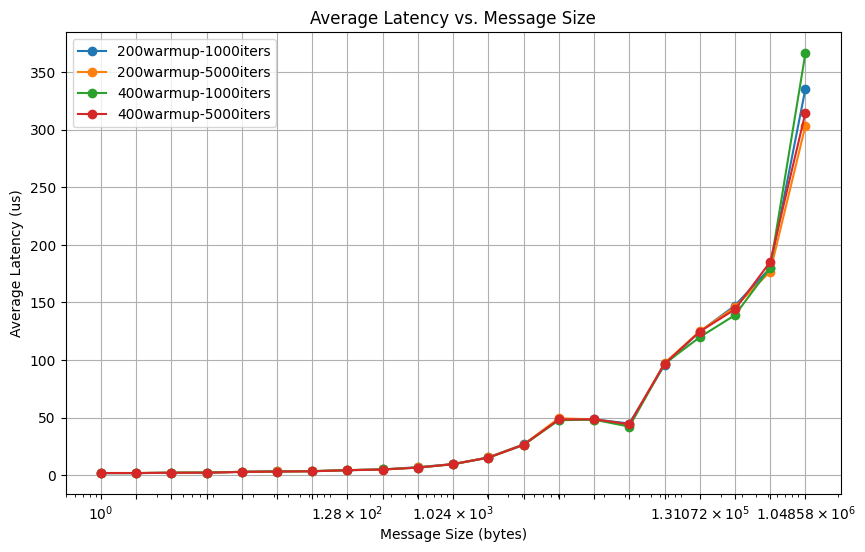

In [5]:
plt.figure(figsize=(10,6))

plt.plot(df_2w1i['Size'], df_2w1i['Avg_Latency_us'], label='200warmup-1000iters', marker='o')
plt.plot(df_2w5i['Size'], df_2w5i['Avg_Latency_us'], label='200warmup-5000iters', marker='o')
plt.plot(df_4w1i['Size'], df_4w1i['Avg_Latency_us'], label='400warmup-1000iters', marker='o')
plt.plot(df_4w5i['Size'], df_4w5i['Avg_Latency_us'], label='400warmup-5000iters', marker='o')

plt.title('Average Latency vs. Message Size')
plt.xlabel('Message Size (bytes)')
plt.ylabel('Average Latency (us)')
plt.xscale('log')
plt.grid(True)
plt.legend()
plt.xticks(df_2w1i['Size'])

plt.show()

### Correlation between Latency and Message Size

In [14]:
log_mex_size_1 = np.log2(df_2w1i['Size'])
log_mex_size_2 = np.log2(df_2w5i['Size'])
log_mex_size_3 = np.log2(df_4w1i['Size'])
log_mex_size_4 = np.log2(df_4w5i['Size'])

# 200 warmup - 1000 iters
corr_avg_lat_1 = log_mex_size_1.corr(df_2w1i["Avg_Latency_us"])
corr_min_lat_1 = log_mex_size_1.corr(df_2w1i["Min_Latency_us"])
corr_max_lat_1 = log_mex_size_1.corr(df_2w1i["Max_Latency_us"])

# 200 warmup - 5000 iters
corr_avg_lat_2 = log_mex_size_2.corr(df_2w5i["Avg_Latency_us"])
corr_min_lat_2 = log_mex_size_2.corr(df_2w5i["Min_Latency_us"])
corr_max_lat_2 = log_mex_size_2.corr(df_2w5i["Max_Latency_us"])

# 400 warmup - 1000 iters
corr_avg_lat_3 = log_mex_size_3.corr(df_4w1i["Avg_Latency_us"])
corr_min_lat_3 = log_mex_size_3.corr(df_4w1i["Min_Latency_us"])
corr_max_lat_3 = log_mex_size_3.corr(df_4w1i["Max_Latency_us"])

# 400 warmup - 5000 iters
corr_avg_lat_4 = log_mex_size_4.corr(df_4w5i["Avg_Latency_us"])
corr_min_lat_4 = log_mex_size_4.corr(df_4w5i["Min_Latency_us"])
corr_max_lat_4 = log_mex_size_4.corr(df_4w5i["Max_Latency_us"])

# Summary table

latency_avg_corr = [corr_avg_lat_1,corr_avg_lat_2,corr_avg_lat_3,corr_avg_lat_4]
latency_min_corr = [corr_min_lat_1,corr_min_lat_2,corr_min_lat_3,corr_min_lat_4]
latency_max_corr = [corr_max_lat_1,corr_max_lat_2,corr_max_lat_3,corr_max_lat_4]

summary_table2 = pd.DataFrame({
    "Average Latency Correlation": latency_avg_corr,
    "Minimum Latency Correlation": latency_min_corr,
    "Maximum Latency Correlation": latency_max_corr
})

summary_table2.index = ["200 warm-up; 1000 iters","200 warm-up; 5000 iters","400 warm-up; 1000 iters","400 warm-up; 5000 iters"]


In [7]:
print(summary_table2)

                         Average Latency Correlation  \
200 warm-up; 1000 iters                     0.777433   
200 warm-up; 5000 iters                     0.796237   
400 warm-up; 1000 iters                     0.753554   
400 warm-up; 5000 iters                     0.789687   

                         Minimum Latency Correlation  \
200 warm-up; 1000 iters                     0.699688   
200 warm-up; 5000 iters                     0.723351   
400 warm-up; 1000 iters                     0.692563   
400 warm-up; 5000 iters                     0.711451   

                         Maximum Latency Correlation  
200 warm-up; 1000 iters                     0.804663  
200 warm-up; 5000 iters                     0.821444  
400 warm-up; 1000 iters                     0.771366  
400 warm-up; 5000 iters                     0.814854  


### Average Latency Increase Distribution

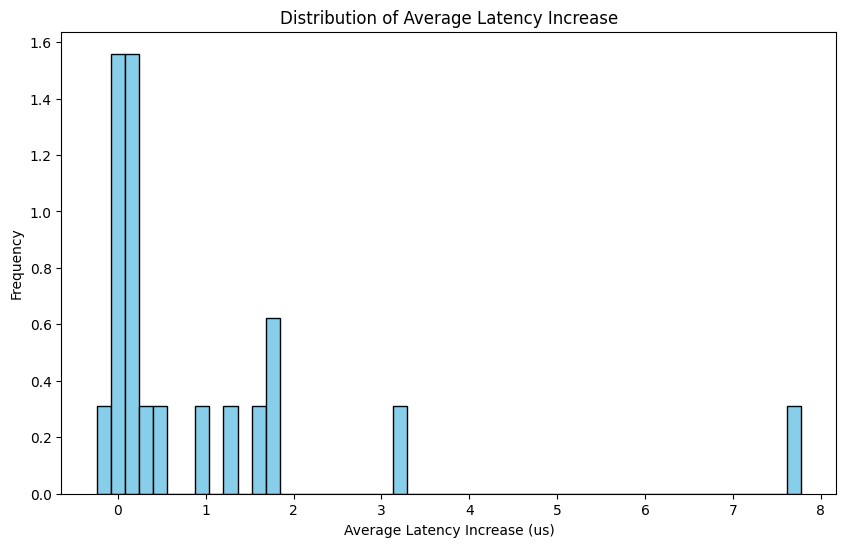

Outliers in Average Latency:
        Size  Avg_Latency_us  Min_Latency_us  Max_Latency_us  Iterations  \
20  1048576          335.48          266.86          375.03        1000   

    Avg_Latency_Increase  
20                7.7775  


In [8]:
# HISTOGRAM

plt.figure(figsize=(10, 6))
plt.hist(df_2w1i["Avg_Latency_Increase"], bins=50, color="skyblue", edgecolor="black", density=True)
plt.xlabel("Average Latency Increase (us)")
plt.ylabel("Frequency")
plt.title("Distribution of Average Latency Increase")

#plt.yscale('log')
plt.show()

# OUTLIERS DETECTION

Q1 = df_2w1i["Avg_Latency_Increase"].quantile(0.25)
Q3 = df_2w1i["Avg_Latency_Increase"].quantile(0.75)
IQR = Q3 - Q1

# Outliers are points that fall outside 1.5*IQR from Q1 or Q3
outliers = df_2w1i[(df_2w1i["Avg_Latency_Increase"] < (Q1 - 1.5 * IQR)) | (df_2w1i["Avg_Latency_Increase"] > (Q3 + 1.5 * IQR))]
print("Outliers in Average Latency:\n", outliers)

## Comparison of latency behaviour between different algorithms

The minimum increase in mean latency and its standard deviation between runs that we performed on the thin node of ORFEO cluster is given by $200$ warm-up iterations and $5000$ iterations - which are the default values.  
So, these are the values for which we computed runs over the same node with $2$ other algorithms. 

In [15]:
benchmark_1_THIN = 'benchmark_1_THIN.txt'
benchmark_2_THIN = 'benchmark_2_THIN.txt'

df_1_thin = pd.read_csv(benchmark_1_THIN, delim_whitespace=True, skiprows=4,usecols=[0,1,2,3,4],names=["Size", "Avg_Latency_us", "Min_Latency_us","Max_Latency_us","Iterations"])
df_2_thin = pd.read_csv(benchmark_2_THIN, delim_whitespace=True, skiprows=4,usecols=[0,1,2,3,4],names=["Size", "Avg_Latency_us", "Min_Latency_us","Max_Latency_us","Iterations"])

### Mean and standard deviation of increase in average latency

In [16]:
df_1_thin['Avg_Latency_Increase'] = df_1_thin['Avg_Latency_us'].diff()/np.log2(df_1_thin["Size"])
df_1_thin_lat_increase = df_1_thin['Avg_Latency_Increase'].dropna()

df_1_thin_mean_increase = df_1_thin_lat_increase.mean()
df_1_thin_std_increase = df_1_thin_lat_increase.std()
# ---
df_2_thin['Avg_Latency_Increase'] = df_2_thin['Avg_Latency_us'].diff()/np.log2(df_2_thin["Size"])
df_2_thin_lat_increase = df_2_thin['Avg_Latency_Increase'].dropna()

df_2_thin_mean_increase = df_2_thin_lat_increase.mean()
df_2_thin_std_increase = df_2_thin_lat_increase.std()
# ---

# Summary table

latency_mean_increases = [df_2w5i_mean_increase,df_1_thin_mean_increase,df_2_thin_mean_increase]
latency_std_increase = [df_2w5i_std_increase,df_1_thin_std_increase,df_2_thin_std_increase]

summary_table3 = pd.DataFrame({
    "Mean Latency Increase": latency_mean_increases,
    "Std Latency Increase": latency_std_increase
})

summary_table3.index = ["Baseline algorithm","Linear algorithm","Linear NB algorithm"]

print(summary_table3)

                     Mean Latency Increase  Std Latency Increase
Baseline algorithm                0.901396              1.559017
Linear algorithm                  5.653179             18.603981
Linear NB algorithm               1.355449              3.200246


### Latency against Message Size

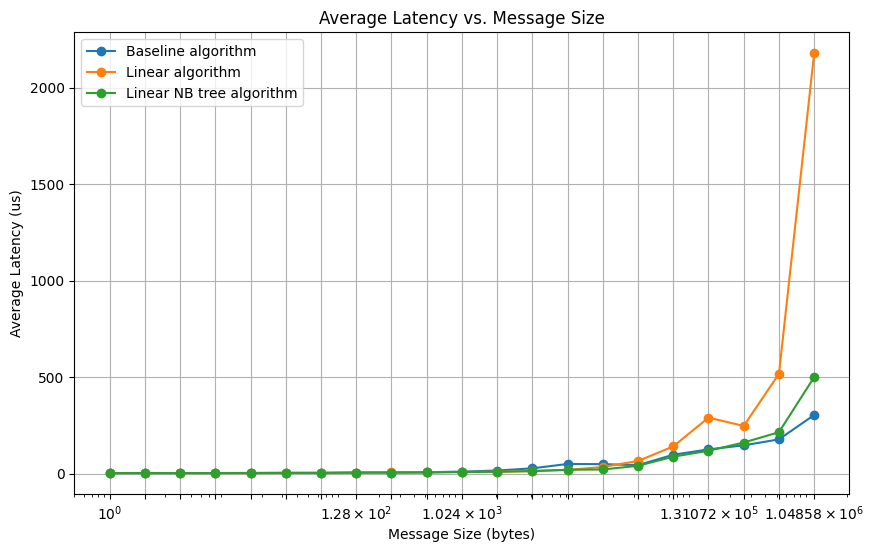

In [17]:
plt.figure(figsize=(10,6))

plt.plot(df_2w5i['Size'], df_2w5i['Avg_Latency_us'], label='Baseline algorithm', marker='o')
plt.plot(df_1_thin['Size'], df_1_thin['Avg_Latency_us'], label='Linear algorithm', marker='o')
plt.plot(df_2_thin['Size'], df_2_thin['Avg_Latency_us'], label='Linear NB tree algorithm', marker='o')

plt.title('Average Latency vs. Message Size')
plt.xlabel('Message Size (bytes)')
plt.ylabel('Average Latency (us)')
plt.xscale('log')
plt.grid(True)
plt.legend()
plt.xticks(df_2w5i['Size'])

plt.show()

### Correlation between latency and message size

In [18]:
log_mex_size_1_thin = np.log2(df_1_thin['Size'])
log_mex_size_2_thin = np.log2(df_2_thin['Size'])

# Linear algorithm
corr_avg_lat_1_thin = log_mex_size_1_thin.corr(df_1_thin["Avg_Latency_us"])
corr_min_lat_1_thin = log_mex_size_1_thin.corr(df_1_thin["Min_Latency_us"])
corr_max_lat_1_thin = log_mex_size_1_thin.corr(df_1_thin["Max_Latency_us"])

# Linear NB algorithm
corr_avg_lat_2_thin = log_mex_size_2_thin.corr(df_2_thin["Avg_Latency_us"])
corr_min_lat_2_thin = log_mex_size_2_thin.corr(df_2_thin["Min_Latency_us"])
corr_max_lat_2_thin = log_mex_size_2_thin.corr(df_2_thin["Max_Latency_us"])

# Summary table

latency_avg_corr = [corr_avg_lat_2,corr_avg_lat_1_thin,corr_avg_lat_2_thin]
latency_min_corr = [corr_min_lat_2,corr_min_lat_1_thin,corr_min_lat_2_thin]
latency_max_corr = [corr_max_lat_2,corr_max_lat_1_thin,corr_max_lat_2_thin]

summary_table4 = pd.DataFrame({
    "Average Latency Correlation": latency_avg_corr,
    "Minimum Latency Correlation": latency_min_corr,
    "Maximum Latency Correlation": latency_max_corr
})

summary_table4.index = ["Baseline algorithm","Linear algorithm","Linear NB algorithm"]

print(summary_table4)

                     Average Latency Correlation  Minimum Latency Correlation  \
Baseline algorithm                      0.796237                     0.723351   
Linear algorithm                        0.533184                     0.493075   
Linear NB algorithm                     0.672793                     0.614182   

                     Maximum Latency Correlation  
Baseline algorithm                      0.821444  
Linear algorithm                        0.548285  
Linear NB algorithm                     0.693735  
